In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
def passive_square(x, y, z, t, xp):
    xc, yc = x - 0.5, y - 0.75
    return xp.where(
        (xp.abs(xc) < 0.15) & (xp.abs(yc) < 0.15),
        1.0,
        0.0,
    )


sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.slotted_disk(
        idx, x, y, z, t, rotation="ccw", xp=xp
    ),
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    p=3,
    interpolation_scheme="transverse",
    MOOD=True,
    max_MOOD_iters=1,
    NAD=0,
    global_dmp=False,
    # PAD={"rho": (0.0, 1.0)},
    # PAD_tol=1e-3,
    # SED=True,
)

sim.run(n=20)

100%|██████████| 20/20 [00:00<00:00, 20.96it/s]


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.1767309834759122), np.float64(1.2062298187843512))

Text(0, 0.5, 'MOOD iterations/step')

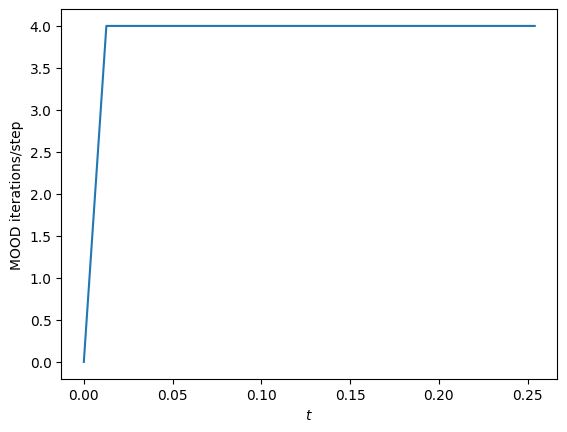

In [4]:
plt.plot(sim.minisnapshots["t"], sim.minisnapshots["MOOD_iters"])
plt.xlabel(r"$t$")
plt.ylabel(r"MOOD iterations/step")

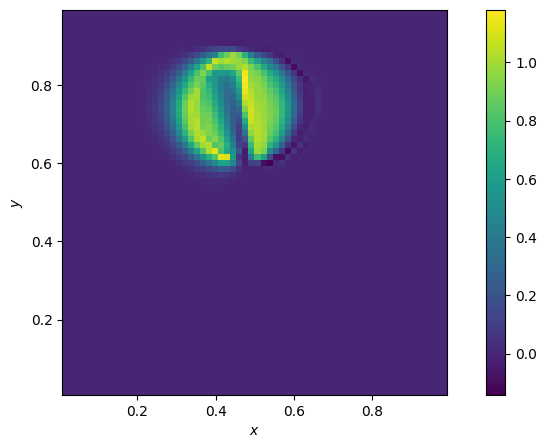

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho")
ax.figure.colorbar(ax.images[0], ax=ax)

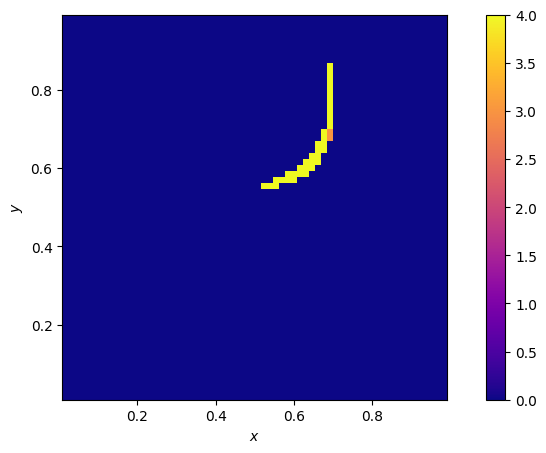

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "troubles", cmap=plt.cm.plasma)
ax.figure.colorbar(ax.images[0], ax=ax)

In [7]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 0.98
AdvectionSolver.log_quantity                              22                 0.00
ExplicitODESolver.integrate                                1                 1.00
ExplicitODESolver.take_step                               20                 0.95
FiniteVolumeSolver.f                                      80                 0.94
FiniteVolumeSolver.inplace_apply_bc                      802                 0.33
FiniteVolumeSolver.inplace_compute_fluxes                160                 0.74
FiniteVolumeSolver.inplace_integrate_fluxes              320                 0.14
FiniteVolumeSolver.inplace_interpolate_faces             320                 0.35
FiniteVolumeSolver.riemann_solver                        320                 0.06
FiniteVolumeSo